In [1]:
pip install pandas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
stock=pd.read_csv("Adani_Stock.csv")
stock.head()

Date    Price     Open     High      Low   Volume Change
0  07 Sep 2023  2509.50  2498.00  2520.00  2485.00  4298988  0.52%
1  06 Sep 2023  2496.50  2494.05  2504.00  2471.00  7416248  0.10%
2  05 Sep 2023  2494.05  2482.00  2501.40  2464.00  6489319  0.95%
3  04 Sep 2023  2470.60  2454.00  2480.00  2450.05  5998454  0.84%
4  01 Sep 2023  2450.05  2381.00  2465.55  2380.00  6764397  1.27%

In [4]:
stock['Date']=pd.to_datetime(stock['Date'])

In [5]:
stock.head()

Date    Price     Open     High      Low   Volume Change
0 2023-09-07  2509.50  2498.00  2520.00  2485.00  4298988  0.52%
1 2023-09-06  2496.50  2494.05  2504.00  2471.00  7416248  0.10%
2 2023-09-05  2494.05  2482.00  2501.40  2464.00  6489319  0.95%
3 2023-09-04  2470.60  2454.00  2480.00  2450.05  5998454  0.84%
4 2023-09-01  2450.05  2381.00  2465.55  2380.00  6764397  1.27%

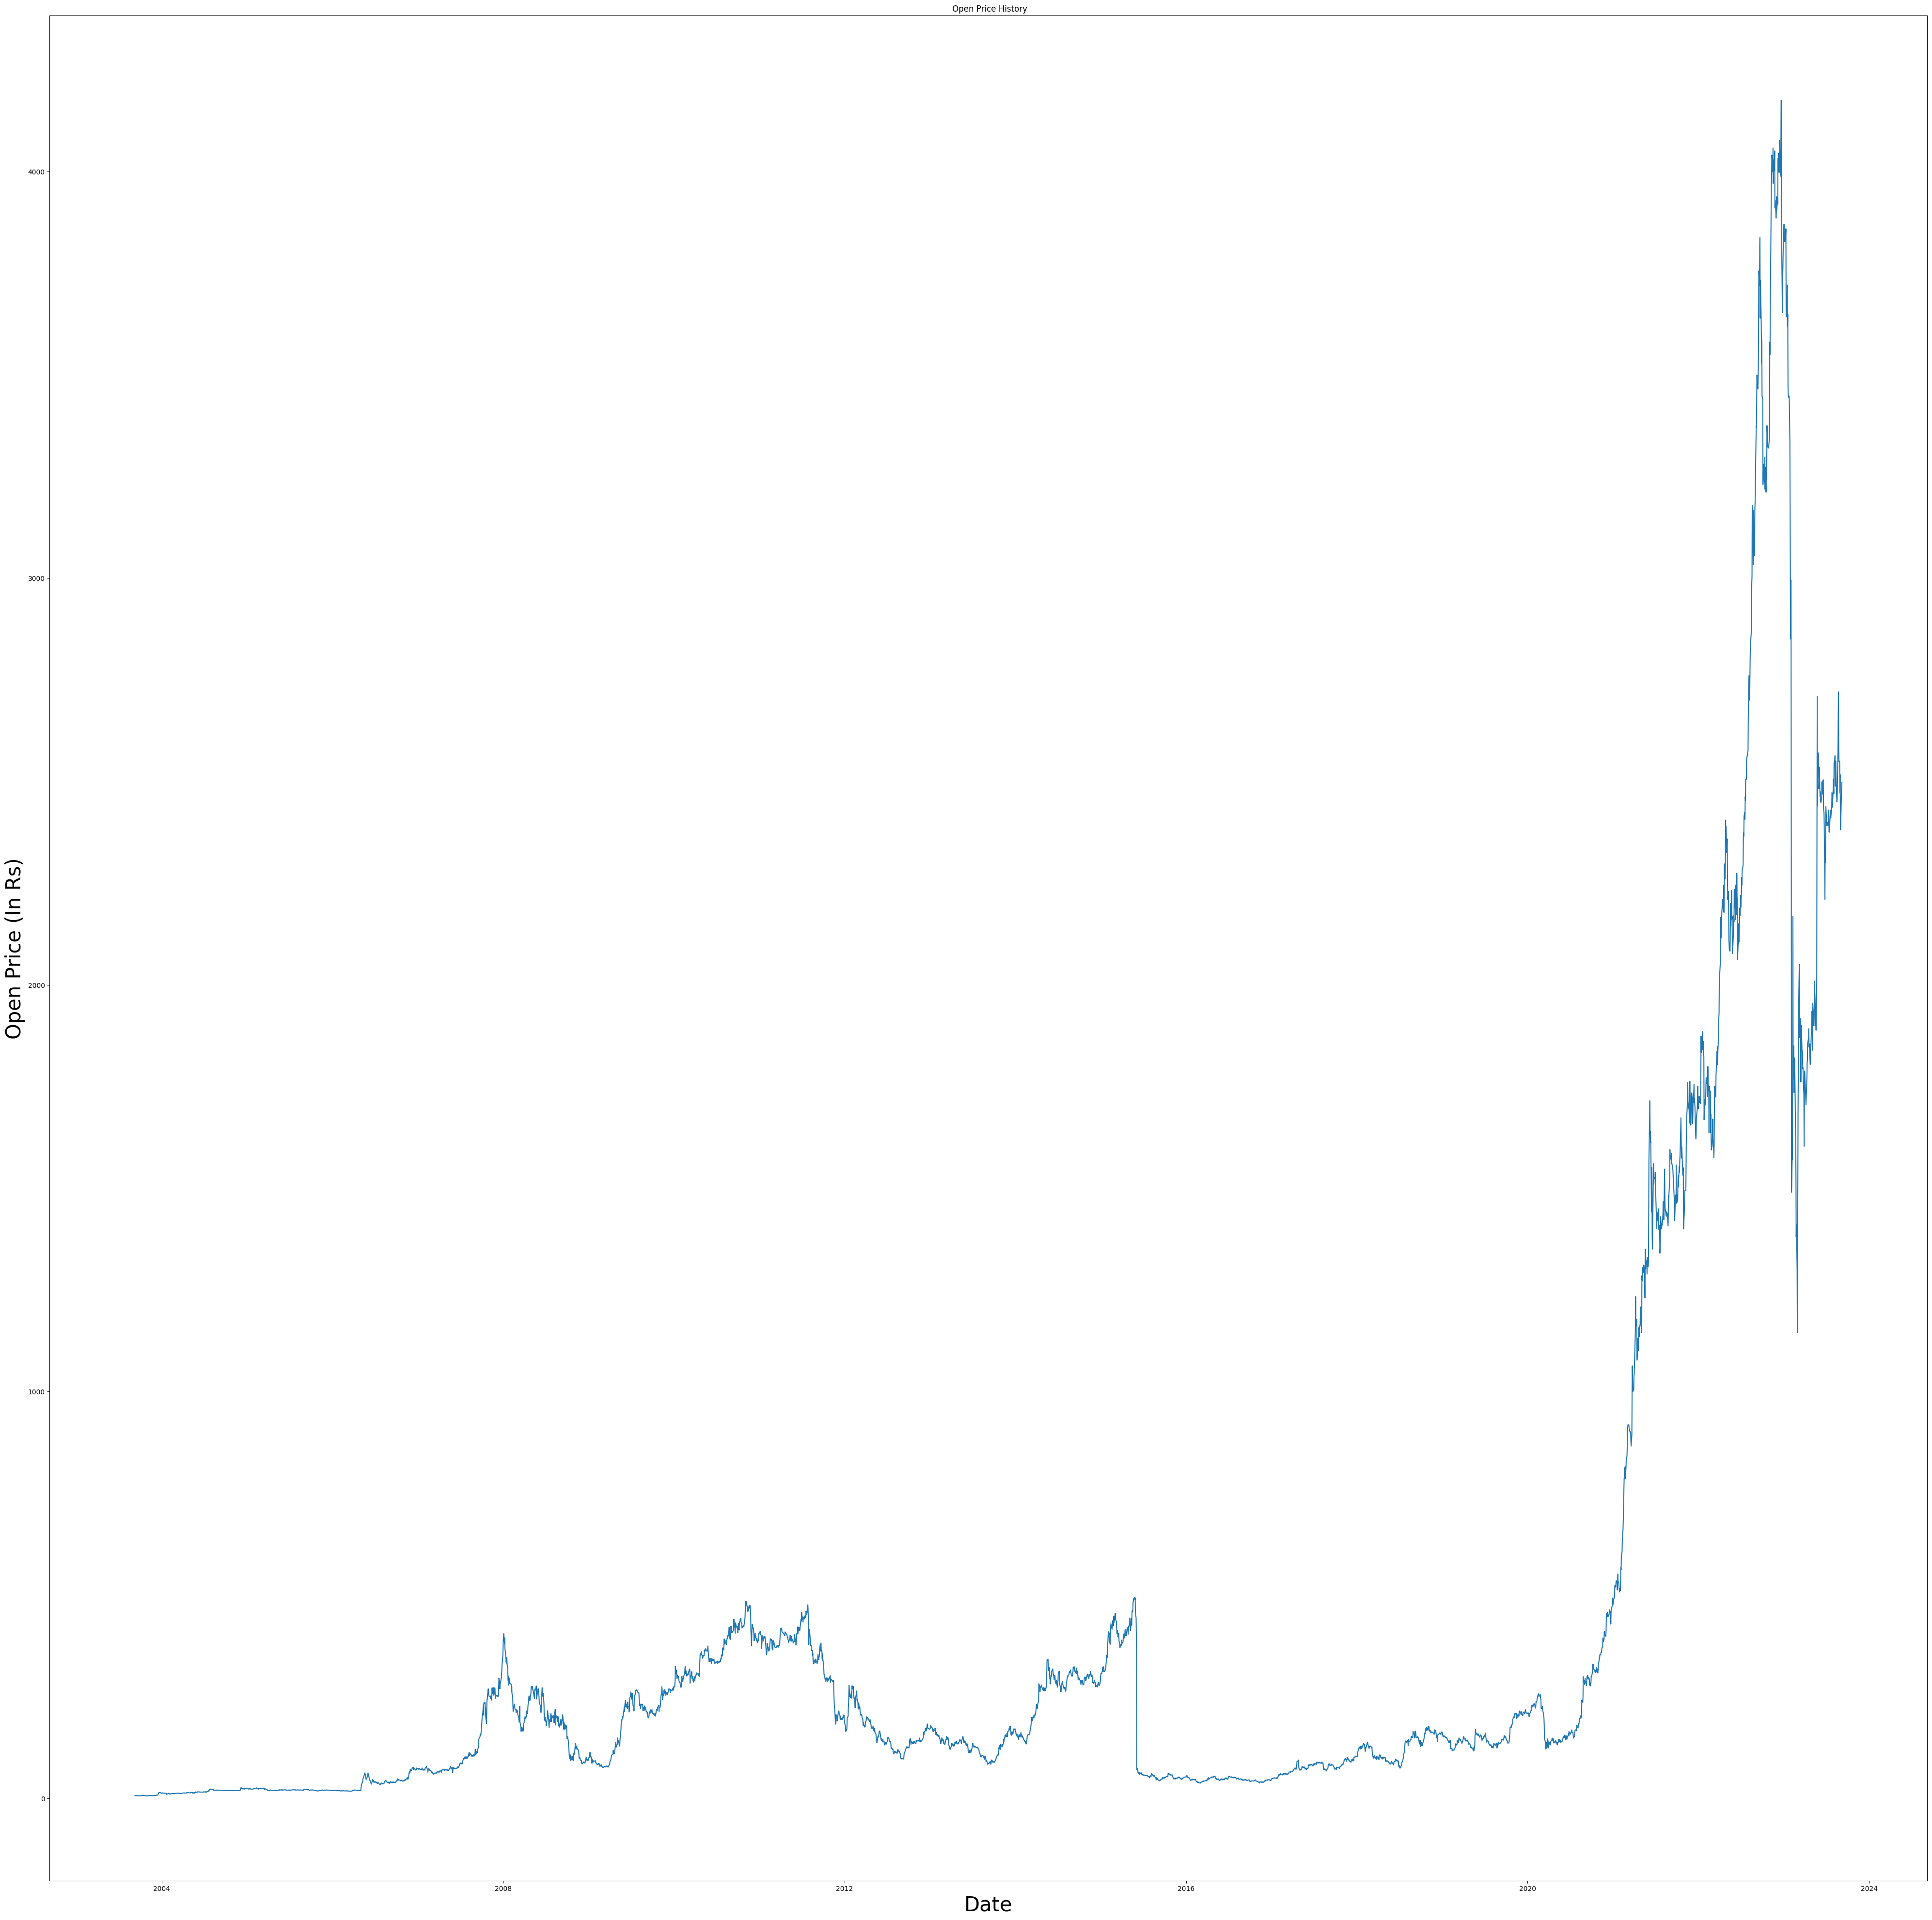

In [6]:
plt.figure(figsize=(50,50))
plt.title(' Open Price History')
plt.plot(stock['Date'],stock['Open'])
plt.xlabel('Date', fontsize=30)
plt.ylabel('Open Price (In Rs)', fontsize=30)
plt.show()

#Here we will be using LSTM Model for predicting Stock Opening Price for Next day. The model will use only one input feature which is Open column and based on the previous trends it will try to predict opening price for next day.

In [7]:
data = stock.filter(['Open'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .80 ))
training_data_len

3976

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[5.97751052e-01],
       [5.96803596e-01],
       [5.93913256e-01],
       ...,
       [1.48714578e-04],
       [1.41518712e-04],
       [1.94288401e-04]])

In [9]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.59775105, 0.5968036 , 0.59391326, 0.58719711, 0.56968717,
       0.58622567, 0.60230843, 0.59153862, 0.61022389, 0.60998403,
       0.61741975, 0.65100047, 0.63873151, 0.61933865, 0.59283388,
       0.58742498, 0.58623767, 0.59343353, 0.61023588, 0.6006294 ,
       0.59543638, 0.61340206, 0.61045176, 0.60909653, 0.59101092,
       0.59655174, 0.59939411, 0.59271395, 0.58311946, 0.59121481,
       0.59162257, 0.5809607 , 0.58144042, 0.57664318, 0.58118857,
       0.58111661, 0.57784249, 0.57422057, 0.568248  , 0.57352497,
       0.58141643, 0.57994128, 0.57251755, 0.57304524, 0.57404067,
       0.57208579, 0.57352497, 0.57544387, 0.58334733, 0.55025833,
       0.55720234, 0.52868272, 0.57239761, 0.5802651 , 0.58064888,
       0.58263973, 0.59919023, 0.59803889, 0.59079505, 0.59101092])]
[0.5979909140189875]

[array([0.59775105, 0.5968036 , 0.59391326, 0.58719711, 0.56968717,
       0.58622567, 0.60230843, 0.59153862, 0.61022389, 0.60998403,
       0.61741975, 0.65100047, 0.638

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [11]:
model = Sequential()
model.add(LSTM(300, return_sequences=True, activation='linear',input_shape= (x_train.shape[1], 1)))
model.add(LSTM(150, return_sequences=False,activation='linear'))
model.add(Dense(100))
model.add(Dense(1))

In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

3916/3916 [==============================] - 233s 59ms/step - loss: 0.0017


In [14]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

32/32 [==============================] - 2s 60ms/step


5.280788103275954

In [15]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-15-8f78faa8f9ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [16]:
valid

Open  Predictions
3976  105.81   101.401741
3977  103.15   101.284897
3978  107.84   100.342720
3979  106.28   102.565193
3980  109.70   103.642021
...      ...          ...
4965    6.67     0.841916
4966    6.66     1.001357
4967    6.56     1.112931
4968    6.53     1.125527
4969    6.75     1.103395

[994 rows x 2 columns]

In [22]:
import pickle
pickle.dump(model,open('lstm_model.pkl',"wb"))

In [19]:
fp= open("scaler.pkl","wb")
pickle.dump(scaler,fp)